# NOVEL CORONA VIRUS PREDICTION FOR COUNTRIES

In [1]:
import pandas as pd
import numpy as np
import pickle


### Loading the dataset
df = pd.read_csv('Dataset\Countries_wise.csv')

In [2]:
df.head()

,Day,Month,Year,Country,Current_Status,Total_Cases
0,1,1,2021,Afghanistan,Active,7608
1,1,1,2021,Afghanistan,Confirmed,51526
2,1,1,2021,Afghanistan,Deaths,2191
3,1,1,2021,Afghanistan,Recovered,41727
4,1,1,2021,Albania,Active,23501


In [3]:
# Return size of dataset
df.shape

(340992, 6)

In [4]:
# Return different datatypes for each columns(float, int, string, bool, etc.)
df.dtypes

Day                int64
Month              int64
Year               int64
Country           object
Current_Status    object
Total_Cases        int64
dtype: object

In [5]:
# Return basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340992 entries, 0 to 340991
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Day             340992 non-null  int64 
 1   Month           340992 non-null  int64 
 2   Year            340992 non-null  int64 
 3   Country         340992 non-null  object
 4   Current_Status  340992 non-null  object
 5   Total_Cases     340992 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 15.6+ MB


In [6]:
# Return a coloumn having null values
df.isnull().sum()

Day               0
Month             0
Year              0
Country           0
Current_Status    0
Total_Cases       0
dtype: int64

In [7]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [8]:
df['Current_Status'].unique()

array(['Active', 'Confirmed', 'Deaths', 'Recovered'], dtype=object)

In [9]:
# Keeping only consistent country
consistent_country =['Afghanistan', 'Argentina', 'Australia', 'Bangladesh', 'Bhutan', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India',
                     'Indonesia', 'Iran', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kenya', 'Mexico', 'Nepal', 'Netherlands', 'New Zealand', 'Pakistan', 
                     'Russia', 'Saudi Arabia', 'Singapore', 'South Africa', 'Spain', 'Sri Lanka', 'Switzerland', 'Thailand', 'Turkey', 'US',
                     'United Kingdom', 'Zimbabwe']

In [10]:
df = df[(df['Country'].isin(consistent_country))]

In [11]:
df

,Day,Month,Year,Country,Current_Status,Total_Cases
0,1,1,2021,Afghanistan,Active,7608
1,1,1,2021,Afghanistan,Confirmed,51526
2,1,1,2021,Afghanistan,Deaths,2191
3,1,1,2021,Afghanistan,Recovered,41727
24,1,1,2021,Argentina,Active,159599
...,...,...,...,...,...,...
340955,31,12,2020,United Kingdom,Recovered,5482
340988,31,12,2020,Zimbabwe,Active,2254
340989,31,12,2020,Zimbabwe,Confirmed,13867
340990,31,12,2020,Zimbabwe,Deaths,363


In [12]:
print(df['Country'].unique())

['Afghanistan' 'Argentina' 'Australia' 'Bangladesh' 'Bhutan' 'Brazil'
 'Canada' 'China' 'France' 'Germany' 'India' 'Indonesia' 'Iran' 'Ireland'
 'Israel' 'Italy' 'Japan' 'Kenya' 'Mexico' 'Nepal' 'Netherlands'
 'New Zealand' 'Pakistan' 'Russia' 'Saudi Arabia' 'Singapore'
 'South Africa' 'Spain' 'Sri Lanka' 'Switzerland' 'Thailand' 'Turkey' 'US'
 'United Kingdom' 'Zimbabwe']


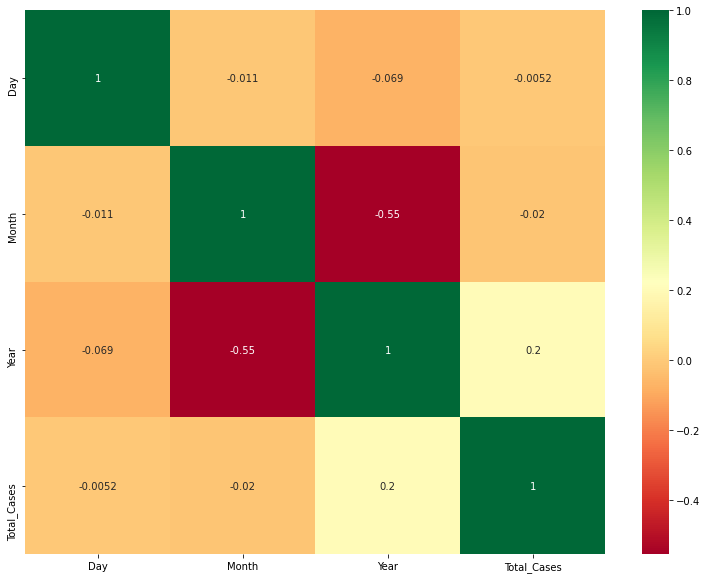

In [13]:
# Selecting correlated features using Heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Get correlation of all the features of the dataset
corr_matrix = df.corr()
top_corr_features = corr_matrix.index

# Plotting the heatmap
plt.figure(figsize=(13,10))
g = sns.heatmap(data=df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [14]:
# --- Data Preprocessing ---
# Converting categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['Country', 'Current_Status'])

In [15]:
encoded_df.head()

,Day,Month,Year,Total_Cases,Country_Afghanistan,Country_Argentina,Country_Australia,Country_Bangladesh,Country_Bhutan,Country_Brazil,...,Country_Switzerland,Country_Thailand,Country_Turkey,Country_US,Country_United Kingdom,Country_Zimbabwe,Current_Status_Active,Current_Status_Confirmed,Current_Status_Deaths,Current_Status_Recovered
0,1,1,2021,7608,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,1,2021,51526,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,1,2021,2191,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,2021,41727,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24,1,1,2021,159599,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [16]:
encoded_df.columns

Index(['Day', 'Month', 'Year', 'Total_Cases', 'Country_Afghanistan',
       'Country_Argentina', 'Country_Australia', 'Country_Bangladesh',
       'Country_Bhutan', 'Country_Brazil', 'Country_Canada', 'Country_China',
       'Country_France', 'Country_Germany', 'Country_India',
       'Country_Indonesia', 'Country_Iran', 'Country_Ireland',
       'Country_Israel', 'Country_Italy', 'Country_Japan', 'Country_Kenya',
       'Country_Mexico', 'Country_Nepal', 'Country_Netherlands',
       'Country_New Zealand', 'Country_Pakistan', 'Country_Russia',
       'Country_Saudi Arabia', 'Country_Singapore', 'Country_South Africa',
       'Country_Spain', 'Country_Sri Lanka', 'Country_Switzerland',
       'Country_Thailand', 'Country_Turkey', 'Country_US',
       'Country_United Kingdom', 'Country_Zimbabwe', 'Current_Status_Active',
       'Current_Status_Confirmed', 'Current_Status_Deaths',
       'Current_Status_Recovered'],
      dtype='object')

In [17]:
# Rearranging the columns
encoded_df = encoded_df[['Country_Afghanistan', 'Country_Argentina', 'Country_Australia', 'Country_Bangladesh', 'Country_Bhutan', 'Country_Brazil', 'Country_Canada', 'Country_China',
                         'Country_France', 'Country_Germany', 'Country_India', 'Country_Indonesia', 'Country_Iran', 'Country_Ireland', 'Country_Israel', 'Country_Italy', 'Country_Japan', 'Country_Kenya',
                         'Country_Mexico', 'Country_Nepal', 'Country_Netherlands', 'Country_New Zealand', 'Country_Pakistan', 'Country_Russia', 'Country_Saudi Arabia', 'Country_Singapore', 'Country_South Africa',
                         'Country_Spain', 'Country_Sri Lanka', 'Country_Switzerland', 'Country_Thailand', 'Country_Turkey', 'Country_US', 'Country_United Kingdom', 'Country_Zimbabwe', 'Current_Status_Active',
                         'Current_Status_Confirmed', 'Current_Status_Deaths', 'Current_Status_Recovered', 'Day', 'Month', 'Year', 'Total_Cases']]

In [18]:
encoded_df.head()

,Country_Afghanistan,Country_Argentina,Country_Australia,Country_Bangladesh,Country_Bhutan,Country_Brazil,Country_Canada,Country_China,Country_France,Country_Germany,...,Country_United Kingdom,Country_Zimbabwe,Current_Status_Active,Current_Status_Confirmed,Current_Status_Deaths,Current_Status_Recovered,Day,Month,Year,Total_Cases
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,2021,7608
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,1,2021,51526
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,2021,2191
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,2021,41727
24,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,2021,159599


In [19]:
# Splitting the data into train and test set
X = encoded_df.drop(labels='Total_Cases', axis=1)
y = encoded_df['Total_Cases'].values

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# Linear Regression Model

In [21]:
# --- Model Building ---
# Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [22]:
accuracy = regressor.score(X_train,y_train)
print(f'Accuracy:{round(accuracy*100,3)}%')

Accuracy:30.064%


# Random Forest Regression Model

In [23]:
# Random Forest Regression Model
from sklearn.ensemble import RandomForestRegressor
random_regressor = RandomForestRegressor()
random_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [24]:
accuracy = random_regressor.score(X_train,y_train)
print(f'Accuracy:{round(accuracy*100,3)}%')

Accuracy:99.998%


# Polynomial Regression 

In [25]:
### Polynomial Regression 
from sklearn.preprocessing import PolynomialFeatures
polyFeat = PolynomialFeatures(degree=2)
X_train = polyFeat.fit_transform(X_train)

In [26]:
# --- Model Building ---
# Linear Regression Model
from sklearn import linear_model
poly_regressor = linear_model.LinearRegression()
poly_regressor.fit(X_train,y_train)

LinearRegression()

In [27]:
accuracy = poly_regressor.score(X_train,y_train)
print(f'Accuracy:{round(accuracy*100,3)}%')

Accuracy:73.924%


# PREDICTION FOR COUNTRIES

In [28]:
def predict(country_wise='Afghanistan', current_status = 'Confirmed', day=26, month=6, year=2021):
        temp_array = list()

        #country_wise
        if country_wise == 'Afghanistan':
            temp_array = temp_array + [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif country_wise == 'Argentina':
            temp_array = temp_array + [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif country_wise == 'Australia':
            temp_array = temp_array + [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif country_wise == 'Bangladesh':
            temp_array = temp_array + [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]    
        elif country_wise == 'Bhutan':
            temp_array = temp_array + [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]  
        elif country_wise == 'Brazil':
            temp_array = temp_array + [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]    
        elif country_wise == 'Canada':
            temp_array = temp_array + [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif country_wise == 'China':
            temp_array = temp_array + [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif country_wise == 'France':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif country_wise == 'Germany':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif country_wise == 'India':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif country_wise == 'Indonesia':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif country_wise == 'Iran':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif country_wise == 'Ireland':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif country_wise == 'Israel':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif country_wise == 'Italy':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif country_wise == 'Japan':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif country_wise == 'Kenya':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif country_wise == 'Mexico':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif country_wise == 'Nepal':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif country_wise == 'Netherlands':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif country_wise == 'New Zealand':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0]
        elif country_wise == 'Pakistan':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0]
        elif country_wise == 'Russia':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0]
        elif country_wise == 'Saudi Arabia':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0]
        elif country_wise == 'Singapore':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0]
        elif country_wise == 'South Africa':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0]
        elif country_wise == 'Spain':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0]
        elif country_wise == 'Sri Lanka':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0]
        elif country_wise == 'Switzerland':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0]
        elif country_wise == 'Thailand':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0]
        elif country_wise == 'Turkey':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0]
        elif country_wise == 'US':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0]
        elif country_wise == 'United Kingdom':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]
        elif country_wise == 'Zimbabwe':
            temp_array = temp_array + [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]    


        #current_status
        if current_status == 'Confirmed':
            temp_array = temp_array + [1,0,0,0]
        elif current_status == 'Active':
            temp_array = temp_array + [0,1,0,0]
        elif current_status == 'Recovered':
            temp_array = temp_array + [0,0,1,0]    
        elif current_status == 'Deaths':
            temp_array = temp_array + [0,0,0,1]
          
            
        # day, month,Year
        temp_array = temp_array +[day, month, year]
        
        # Converting into numpy array
        data = np.array([temp_array])
        
         # Prediction
        return int(random_regressor.predict(data)[0])    

In [29]:
country_prediction = predict(country_wise='India', current_status='Confirmed', day=1, month=7, year=2021)
print("MY PREDICTION FOR CORONA_VIRUS :-")
print("The Final Predicted Upcoming Confirmed CoronaVirus Cases: {} ".format(country_prediction))

MY PREDICTION FOR CORONA_VIRUS :-
The Final Predicted Upcoming Confirmed CoronaVirus Cases: 627136 


In [30]:
country_prediction = predict(country_wise='India', current_status='Active', day=1, month=7, year=2021)
print("MY PREDICTION FOR CORONA_VIRUS :-")
print("The Final Predicted Upcoming Active CoronaVirus Cases: {} ".format(country_prediction))

MY PREDICTION FOR CORONA_VIRUS :-
The Final Predicted Upcoming Active CoronaVirus Cases: 12371534 


In [31]:
country_prediction = predict(country_wise='India', current_status='Recovered', day=1, month=7, year=2021)
print("MY PREDICTION FOR CORONA_VIRUS :-")
print("The Final Predicted Upcoming Recovered CoronaVirus Cases: {} ".format(country_prediction))

MY PREDICTION FOR CORONA_VIRUS :-
The Final Predicted Upcoming Recovered CoronaVirus Cases: 163001 


In [32]:
country_prediction = predict(country_wise='India', current_status='Deaths', day=1, month=7, year=2021)
print("MY PREDICTION FOR CORONA_VIRUS :-")
print("The Final Predicted Upcoming Deaths CoronaVirus Cases: {} ".format(country_prediction))

MY PREDICTION FOR CORONA_VIRUS :-
The Final Predicted Upcoming Deaths CoronaVirus Cases: 11595375 
